In [3]:
from PIL import Image as img
import numpy as np
import cv2
import matplotlib.pyplot as plt
lena=img.open('/Users/wangyiyao/NTU-CV/lena.bmp')
lena_arr = np.asarray(lena)

In [37]:
def Dilation(lena,mask):
    m=len(mask)
    n=len(mask[0])
    mm=len(lena)
    nn=len(lena[0])
    res=[[0]*nn for i in range(mm)]
    for i in range(m//2,mm-m//2):
        for j in range(n//2,nn-n//2):
            tmp=1
            check=0
            for k in range(m):
                for l in range(n):
                    if mask[k][l]==0:
                        if lena[i-(m//2-k)][j-(n//2-l)]==1:
                            check=1
                            break
                if check:
                    break
            if check:
                res[i][j]=1
            else:
                res[i][j]=0
    return res

            

In [32]:
mask1=[[1,0,0,0,1],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[1,0,0,0,1]]
a=Dilation(lena_arr//128,mask1)

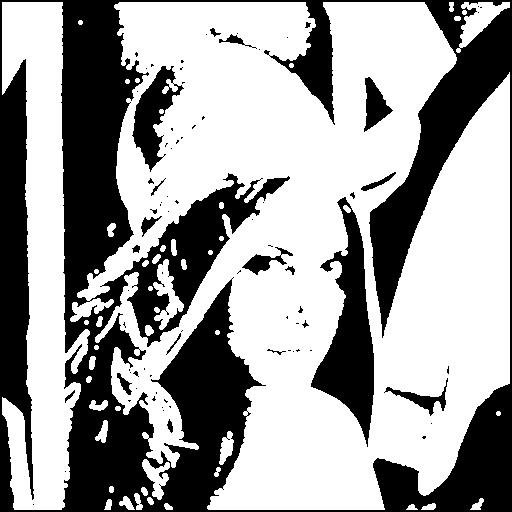

In [33]:
img.fromarray(np.array(a,dtype='uint8')*255)

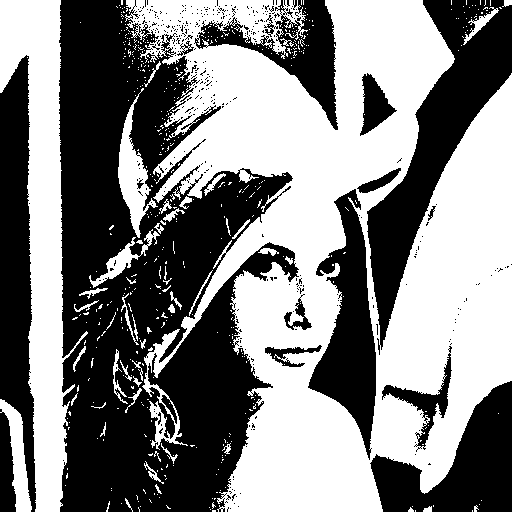

In [13]:
img.fromarray((lena_arr//128)*255)

In [44]:
def Erosion(lena,mask):
    m=len(mask)
    n=len(mask[0])
    mm=len(lena)
    nn=len(lena[0])
    res=[[0]*nn for i in range(mm)]
    for i in range(m//2,mm-m//2):
        for j in range(n//2,nn-n//2):
            tmp=1
            check=0
            for k in range(m):
                for l in range(n):
                    if mask[k][l]==1:
                        if lena[i-(m//2-k)][j-(n//2-l)]==0:
                            check=1
                            break
                if check:
                    break
            if check:
                res[i][j]=0
            else:
                res[i][j]=1
    return res

In [45]:
mask1=[[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]]
b=Erosion(lena_arr//128,mask1)

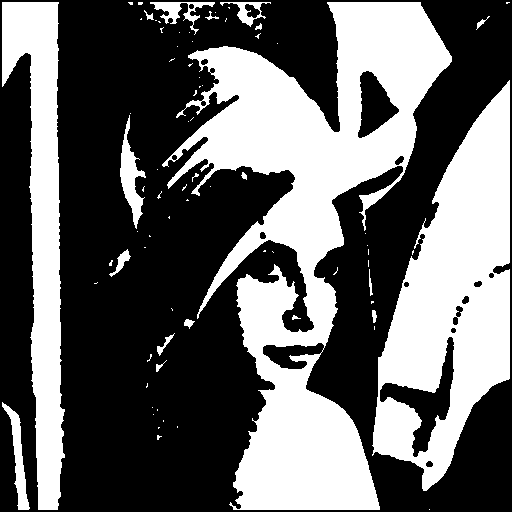

In [46]:
img.fromarray(np.array(b,dtype='uint8')*255)

In [53]:
def closing(lena,mask):
    return Erosion(Dilation(lena,-np.array(mask)+1),mask)

In [54]:
mask1=[[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]]
c=closing(lena_arr//128,mask1)

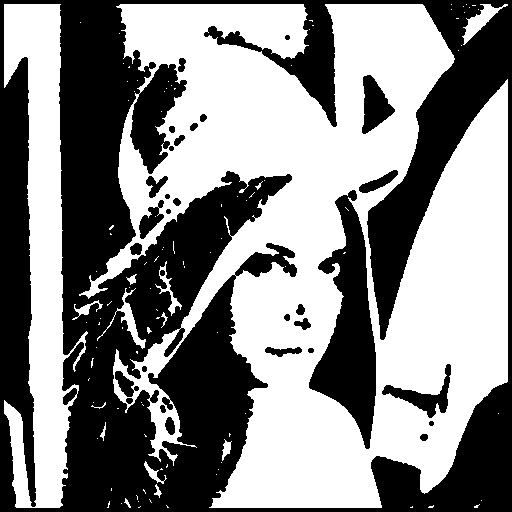

In [55]:
img.fromarray(np.array(c,dtype='uint8')*255)

In [57]:
def opening(lena,mask):
    return Dilation(Erosion(lena,mask),-np.array(mask)+1)

In [59]:
mask1=[[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]]
d=opening(lena_arr//128,mask1)

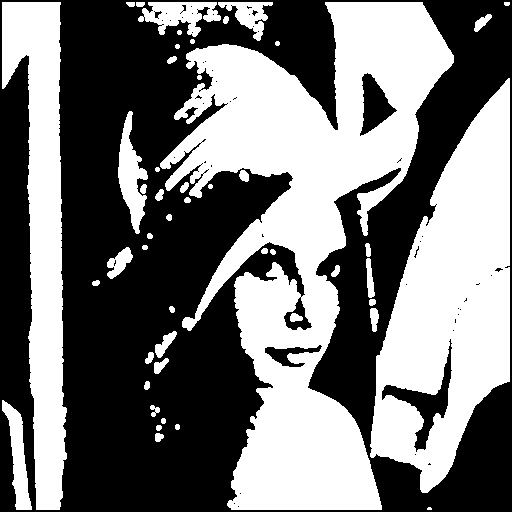

In [60]:
img.fromarray(np.array(d,dtype='uint8')*255)

In [128]:
def hit_and_miss(lena,mask1,mask2):
    return np.array(Erosion(lena,mask1))*np.array(Erosion(-lena+1,mask2))

In [131]:
mask1=[[0,0,0],[1,1,0],[0,1,0]]
mask2=[[0,1,1],[0,0,1],[0,0,0]]
e=hit_and_miss(lena_arr//128,mask1,mask2)

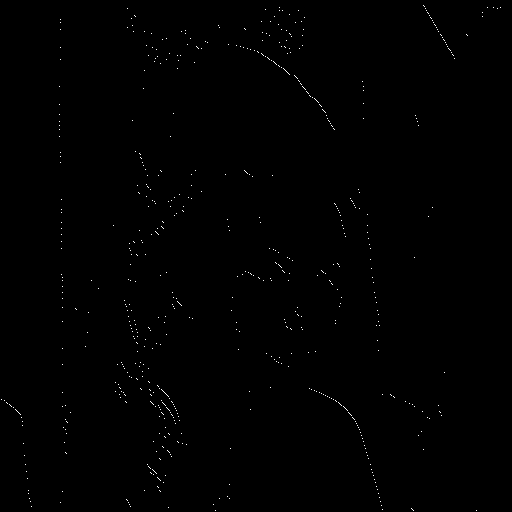

In [132]:
img.fromarray(np.array(e,dtype='uint8')*255)